In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
%matplotlib inline
import winsound

# df = pd.read_csv("../Data/bank.csv", sep=";")
df = pd.read_csv("../Data/Cleaned/bank_cleaned.csv")
print(len(df))
print(len(df.columns))
df.head()

4521
43


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y
0,0.161765,0.068455,0.600000,0.024826,0.000000,0.000000,0.00,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.205882,0.108750,0.333333,0.071500,0.000000,0.389908,0.16,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.235294,0.062590,0.500000,0.059914,0.000000,0.379587,0.04,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.161765,0.064281,0.066667,0.064548,0.061224,0.000000,0.00,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0.588235,0.044469,0.133333,0.073486,0.000000,0.000000,0.00,1,0,0,...,0,0,1,0,0,0,0,0,1,0


2
4
6
8
10
(1) ['hidden_layer = 2', 0.90274093722369586]
(2) ['hidden_layer = 2, 2', 0.905393457117595]
(3) ['hidden_layer = 2, 2, 2', 0.88770999115826699]
(4) ['hidden_layer = 2, 2, 2, 2', 0.90185676392572944]
(5) ['hidden_layer = 2, 2, 2, 2, 2', 0.90008841732979661]
(6) ['hidden_layer = 4', 0.90274093722369586]
(7) ['hidden_layer = 4, 4', 0.90362511052166228]
(8) ['hidden_layer = 4, 4, 4', 0.90097259062776303]
(9) ['hidden_layer = 4, 4, 4, 4', 0.89920424403183019]
(10) ['hidden_layer = 4, 4, 4, 4, 4', 0.8885941644562334]
(11) ['hidden_layer = 6', 0.905393457117595]
(12) ['hidden_layer = 6, 6', 0.90981432360742709]
(13) ['hidden_layer = 6, 6, 6', 0.90627763041556142]
(14) ['hidden_layer = 6, 6, 6, 6', 0.90097259062776303]
(15) ['hidden_layer = 6, 6, 6, 6, 6', 0.89213085764809907]
(16) ['hidden_layer = 8', 0.90716180371352784]
(17) ['hidden_layer = 8, 8', 0.90981432360742709]
(18) ['hidden_layer = 8, 8, 8', 0.90274093722369586]
(19) ['hidden_layer = 8, 8, 8, 8', 0.89920424403183019]
(2

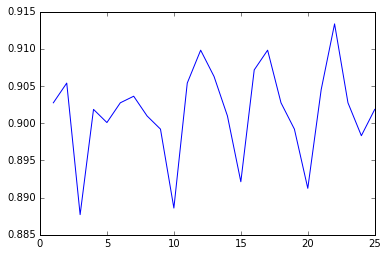

In [22]:
input_neurons = len(df.columns) # == 43
# hidden_layer = [10, 20, 30, input_neurons, int(input_neurons*1.5), input_neurons*2, input_neurons*3, input_neurons*4]
# hidden_layer = [10, 20]
hidden_layer = [i*2 for i in range(1,6)]

names = []
for layer in hidden_layer:
    print(layer)
    names.append("hidden_layer = %s"%(layer))
    names.append("hidden_layer = %s, %s"%(layer, layer))
    names.append("hidden_layer = %s, %s, %s"%(layer, layer, layer))
    names.append("hidden_layer = %s, %s, %s, %s"%(layer, layer, layer, layer))
    names.append("hidden_layer = %s, %s, %s, %s, %s"%(layer, layer, layer, layer, layer))

classifiers = []
for layer in hidden_layer:
    classifiers.append(MLPClassifier(hidden_layer_sizes=(layer,), random_state=1, max_iter=500))
    classifiers.append(MLPClassifier(hidden_layer_sizes=(layer,layer), random_state=1,max_iter=500))
    classifiers.append(MLPClassifier(hidden_layer_sizes=(layer,layer,layer), random_state=1, max_iter=500))
    classifiers.append(MLPClassifier(hidden_layer_sizes=(layer,layer,layer,layer), random_state=1, max_iter=500))
    classifiers.append(MLPClassifier(hidden_layer_sizes=(layer,layer,layer,layer,layer), random_state=1, max_iter=500))

X = df.drop('y',axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y)#, test_size=.4)

i = 0
ilist = []
best_score = None
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    i+=1
    if best_score is None:
        best_score = i, name, score
    if score > best_score[2]:
        best_score = i, name, score


    ilist.append(i)
    print("(%s)"%(i), [name, score])
#         print("(%s)"%(i), name, "\t\t\t score = ", score)

    scores.append(score)

    # alpha = 1e-05 | score =  0.90450928382
    # alpha = 0.001 | score =  0.909814323607
    # alpha = 0.1 | score =  0.909814323607
    # alpha = 10.0 | score =  0.88240495137
    # alpha = 1000.0 | score =  0.88240495137
    
#     (1) ['alpha = 1e-06', 0.89213085764809907]
#     (2) ['alpha = 1e-05', 0.89213085764809907]
#     (3) ['alpha = 0.0001', 0.89036251105216624]
#     (4) ['alpha = 0.001', 0.89213085764809907]
#     (5) ['alpha = 0.01', 0.89124668435013266]
#     (6) ['alpha = 0.1', 0.90097259062776303]
#     (7) ['alpha = 1.0', 0.89920424403183019]
#     best score =  (6, 'alpha = 0.1', 0.90097259062776303)

print("best score = ", best_score)

plt.plot(ilist, scores)
plt.show()

winsound.Beep(300,300)
winsound.Beep(400,300)
winsound.Beep(300,300)
